In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = pd.read_csv('train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Getting to know the data

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [5]:
data_train.select_dtypes(include = ['object']).head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [6]:
data_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

### First treatment and cleaning

#### Unnecessary columns

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin could be important, but i see no way to transform it in readable data. All the others columns in dtype as object should be dropped.

In [8]:
data_train.drop(['Name', 'Ticket', 'Cabin'], axis =1, inplace = True)

#### NaN

In [9]:
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [10]:
age_nan = data_train[data_train['Age'].isna()]

In [11]:
data_train.Age.mean()

29.69911764705882

In [12]:
df_nonan = data_train[~data_train.isin(age_nan)] #training the ~isin method 
df_nonan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    float64
 1   Survived     714 non-null    float64
 2   Pclass       714 non-null    float64
 3   Sex          714 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        714 non-null    float64
 6   Parch        714 non-null    float64
 7   Fare         714 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(7), object(2)
memory usage: 62.8+ KB


In [13]:
df_nonan = data_train.dropna()
df_nonan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


In [14]:
data_train.dropna(inplace = True)

#### Dummies

The columns sex and embarked could be transformed to dummies (categorical).
We saw some null data in Embarked, but we can consider that the port which the passenger embarked was not listed.

In [15]:
print(data_train['Embarked'].unique(), '\n', data_train['Pclass'].unique())

['S' 'C' 'Q'] 
 [3 1 2]


In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop = 'if_binary')
df_encoded = pd.DataFrame(encoder.fit_transform(data_train[['Sex', 'Pclass']]).toarray(), columns = ['male', 'class_1', 'class_2', 'class_3'])


In [17]:
df_treated = pd.concat([data_train.drop(['Sex','Embarked','Pclass','PassengerId'], axis=1), df_encoded], axis =1) #Embarked doesnt sound like an important categorical column

In [18]:
#data_train = pd.concat([data_train.drop(['Sex','Embarked'], axis = 1),pd.get_dummies(data_train[['Sex','Embarked']])],axis=1)
#data_train

In [19]:
#data_train.rename(columns = {'Sex_female':'female', 'Sex_male': 'male'}, inplace=True)

In [20]:
df_treated.dropna(inplace= True)

### Normalizing the Data

In [21]:
#Normalizing the columns Age, Parch and Fare 

In [22]:
X = df_treated[['Age', 'Parch', 'Fare']].to_numpy()

In [23]:
from sklearn.preprocessing import Normalizer

norm = Normalizer().fit(X)
X = norm.transform(X)

In [24]:
df_treated[['Age', 'Parch', 'Fare']] = X

In [25]:
df_treated

,Survived,Age,SibSp,Parch,Fare,male,class_1,class_2,class_3
0,0.0,0.949757,1.0,0.0,0.312988,1.0,0.0,0.0,1.0
1,1.0,0.470417,1.0,0.0,0.882444,0.0,1.0,0.0,0.0
2,1.0,0.956551,0.0,0.0,0.291564,0.0,0.0,0.0,1.0
3,1.0,0.550338,1.0,0.0,0.834942,0.0,1.0,0.0,0.0
4,0.0,0.974555,0.0,0.0,0.224148,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
705,0.0,0.832050,0.0,0.0,0.554700,1.0,0.0,1.0,0.0
706,1.0,0.957826,0.0,0.0,0.287348,1.0,0.0,0.0,1.0
707,1.0,0.847658,0.0,0.0,0.530543,0.0,0.0,0.0,1.0
708,1.0,0.143661,0.0,0.0,0.989627,1.0,0.0,1.0,0.0


### Splitting test and train

In [26]:
y = df_treated['Survived']
X = df_treated.drop('Survived', axis =1 )

In [27]:
from sklearn.model_selection import train_test_split

SEED = np.random.randint(999)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = SEED)

### Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
model_rf = RandomForestClassifier(max_depth = 6)
model_rf.fit(X_train, y_train)
predict = model_rf.predict(X_test)

In [31]:
model_rf.score(X_test, y_test)

0.6382978723404256

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

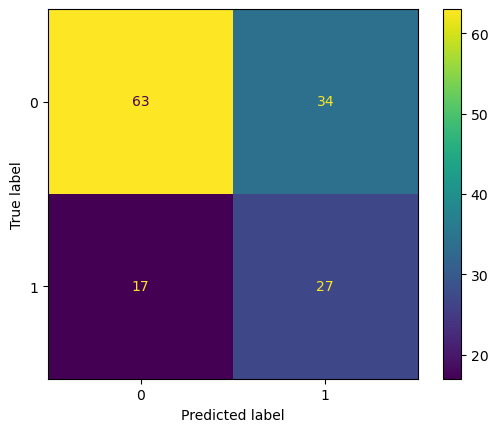

In [33]:
matriz_confusao = confusion_matrix(predict, y_test)

visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot()

In [34]:
X_test

,Age,SibSp,Parch,Fare,male,class_1,class_2,class_3
503,0.968029,0.0,0.0,0.250837,1.0,0.0,1.0,0.0
39,0.779735,1.0,0.0,0.626110,0.0,0.0,1.0,0.0
1,0.470417,1.0,0.0,0.882444,0.0,1.0,0.0,0.0
238,0.875242,0.0,0.0,0.483686,1.0,0.0,0.0,1.0
478,0.946237,0.0,0.0,0.323475,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
38,0.707107,2.0,0.0,0.707107,0.0,1.0,0.0,0.0
236,0.860927,1.0,0.0,0.508729,0.0,0.0,0.0,1.0
376,0.949757,0.0,0.0,0.312988,0.0,0.0,1.0,0.0
387,0.940554,0.0,0.0,0.339644,1.0,1.0,0.0,0.0


In [35]:
first_try = pd.DataFrame(data = {'real': y_test,'predito': predict})
first_try.to_csv('random_forest_v1.csv', index = False)

,Age,SibSp,Parch,Fare,male,class_1,class_2,class_3
503,0.968029,0.0,0.0,0.250837,1.0,0.0,1.0,0.0
39,0.779735,1.0,0.0,0.626110,0.0,0.0,1.0,0.0
1,0.470417,1.0,0.0,0.882444,0.0,1.0,0.0,0.0
238,0.875242,0.0,0.0,0.483686,1.0,0.0,0.0,1.0
478,0.946237,0.0,0.0,0.323475,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
38,0.707107,2.0,0.0,0.707107,0.0,1.0,0.0,0.0
236,0.860927,1.0,0.0,0.508729,0.0,0.0,0.0,1.0
376,0.949757,0.0,0.0,0.312988,0.0,0.0,1.0,0.0
387,0.940554,0.0,0.0,0.339644,1.0,1.0,0.0,0.0
